## Regressão Linear

##### Usaremos o conjunto de dados "diabetes" contido no scikit-learn

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Vamos verificar a relação entre renda média da vizinhança e valor das casas

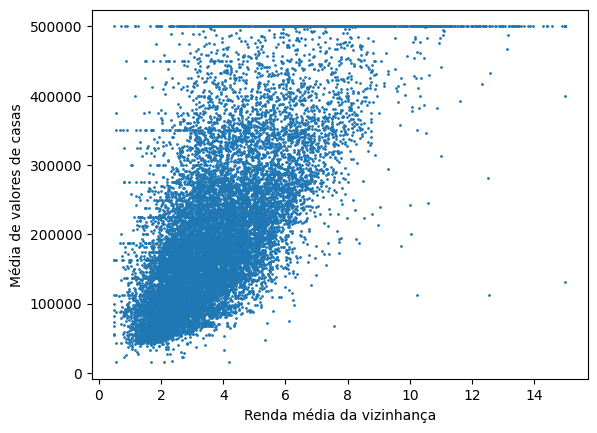

In [5]:
# Gráfico de dispersão
plt.scatter(df['median_income'], df['median_house_value'], s=1)
plt.xlabel('Renda média da vizinhança')
plt.ylabel('Média de valores de casas')
plt.show()


### O método fit() da classe LinearRegression() espera que as variáveis independentes X e a variável dependente y sejam fornecidas como matrizes numpy bidimensionais.

In [6]:
X = pd.DataFrame(df['median_income'])
# Atalho: X = df[['median_income']]
X

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250
...,...
16995,2.3571
16996,2.5179
16997,3.0313
16998,1.9797


In [15]:
# Unidimensional
y = df['median_house_value'].values

(17000,)

In [16]:
# Bidimensional
y = df['median_house_value'].values.reshape(-1,1)
y

(17000, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

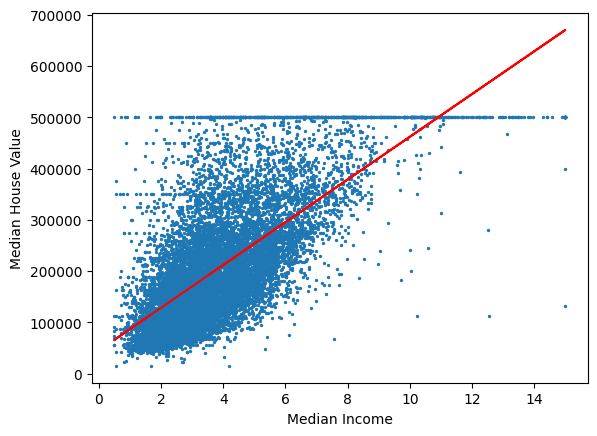

In [11]:
plt.scatter(X_train, y_train, s=2)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [18]:
dado_exemplo = np.array([[5]]) # Vamos testar, se uma pessoa tiver uma renda de 5
prediction = model.predict(dado_exemplo)
prediction

c:\Users\caim_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[253587.96323924]])

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
accuracy

0.4977788854008406